In [202]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import scipy as sp
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import copy

In [203]:
drug_crime_file = pd.read_csv("crime_filtered.csv")

In [204]:
drug_crime_file.drop(["SHOOTING", "Lat", "Long"], axis=1)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Location
0,I182015459,1842,Drug Violation,"DRUGS - POSS CLASS A - HEROIN, ETC.",B2,329,2/27/18 20:51,2018,2,Tuesday,20,Part Two,COLUMBIA RD,"(42.30673444, -71.07712722)"
1,I182015459,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",B2,329,2/27/18 20:51,2018,2,Tuesday,20,Part Two,COLUMBIA RD,"(42.30673444, -71.07712722)"
2,I182015313,1830,Drug Violation,DRUGS - SICK ASSIST - HEROIN,B3,457,2/27/18 12:01,2018,2,Tuesday,12,Part Two,ESMOND ST,"(42.29861988, -71.08511004)"
3,I182015294,1845,Drug Violation,DRUGS - POSS CLASS D,A7,25,2/27/18 11:21,2018,2,Tuesday,11,Part Two,WHITE ST,"(42.38053192, -71.03510439)"
4,I182015238,1806,Drug Violation,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS,E18,494,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,"(42.25977993, -71.11623073)"
5,I182015238,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,E18,494,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,"(42.25977993, -71.11623073)"
6,I182015238,1848,Drug Violation,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP,E18,494,2/27/18 4:47,2018,2,Tuesday,4,Part Two,ARLINGTON ST,"(42.25977993, -71.11623073)"
7,I182015120,1815,Drug Violation,DRUGS - POSSESSION,C11,363,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,"(42.29426595, -71.05968487)"
8,I182015120,1810,Drug Violation,DRUGS - SALE / MANUFACTURING,C11,363,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,"(42.29426595, -71.05968487)"
9,I182015120,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,C11,363,2/26/18 16:50,2018,2,Monday,16,Part Two,CENTRE ST,"(42.29426595, -71.05968487)"


In [207]:
categories = set(drug_crime_file.OFFENSE_DESCRIPTION)

In [208]:
category_set = set()
for string in categories:
    for i in string.split(" "):
        category_set.add(i)

In [209]:
features = ["Class A", "Class B", "CLass C", "Class D", "Class E", 
            "Possesion", "Trafficking", "Sale or Manufacturing", "Sick Assist", "Other"]

In [210]:
mapping = {"A":0, "B":1, "C":2, "D":3, "E":4, "POSS":5, "POSSESSION":5, "TRAFFICKING":6, "SALE":7 ,"SICK":8}

In [211]:
sample = [0 for i in range(10)]
feature_matrix = []
for idx, row in drug_crime_file.iterrows():
    temp_list = sample.copy()
    flag = 0
    for word in row["OFFENSE_DESCRIPTION"].split(" "):
        if word in mapping.keys():
            flag = 1
            temp_list[mapping[word]] += 1
    if flag == 0:
        temp_list[9] = 1
    for index in range(len(temp_list)):
        if temp_list[index] == 2:
            temp_list[index] -= 1
    if str(row["Lat"]) != "nan" and str(row["Lat"]) != "-1.0":
        feature_matrix.append(temp_list)

In [213]:
loc = []
#type(df2["Lat"][0])
for line in drug_crime_file.itertuples():
    if str(line.Lat) != "nan" and str(line.Lat) != "-1.0":
        loc.append([line.Lat,line.Long])
        
loc = np.asarray(loc)

scaler = MinMaxScaler(copy=True, feature_range=(1,7))
scaler.fit(loc)
loc_arr = scaler.transform(loc)
#print(loc_arr)
loc_ls = loc_arr.tolist()

for i in range(len(loc_ls)):
    for j in loc_ls[i]:
        feature_matrix[i].append(j)
feature_matrix

[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3.7527914055121983, 4.283169502260989],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3.7527914055121983, 4.283169502260989],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3.448306301232151, 4.013279605824664],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 6.5219167053940055, 5.703912702866091],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1.9909030377177714, 2.961125128945241],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1.9909030377177714, 2.961125128945241],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1.9909030377177714, 2.961125128945241],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3.284932460866685, 4.872875149526408],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3.284932460866685, 4.872875149526408],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3.284932460866685, 4.872875149526408],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4.248043112775804, 4.132830712311716],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5.6943304726191855, 5.09073932442152],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 5.6943304726191855, 5.09073932442152],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 5.6943304726191855, 5.09073932442152],


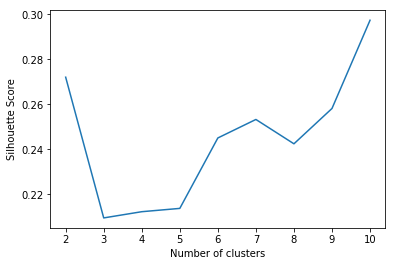

In [215]:
# Find Clusters by Kmeans++
feature_arr_matrix = np.array(feature_matrix)
def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
sc_evaluate_clusters(feature_arr_matrix,10)

In [216]:
feature_matrix

[[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3.7527914055121983, 4.283169502260989],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 3.7527914055121983, 4.283169502260989],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3.448306301232151, 4.013279605824664],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 6.5219167053940055, 5.703912702866091],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1.9909030377177714, 2.961125128945241],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1.9909030377177714, 2.961125128945241],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1.9909030377177714, 2.961125128945241],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3.284932460866685, 4.872875149526408],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3.284932460866685, 4.872875149526408],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3.284932460866685, 4.872875149526408],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4.248043112775804, 4.132830712311716],
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 5.6943304726191855, 5.09073932442152],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 5.6943304726191855, 5.09073932442152],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 5.6943304726191855, 5.09073932442152],


In [217]:
# define a method to label differrent clusters
def label_clusters(labels):
    cluster = np.array([[0 for i in range(10)] for j in range(7)])
    for i in range(len(labels)):
        cluster[labels[i]] += np.array(feature_matrix[i][:10])
        
    cluster_ls = copy.deepcopy(cluster.tolist())
    print(cluster)
    
    label_index_list = [0 for i in range(7)]
    label_index_list_second = [0 for i in range(7)]
    label_index_list_third = [0 for i in range(7)]
    
    for i in range(len(cluster_ls)):
        label_index_list[i] = cluster_ls[i].index(max(cluster_ls[i]))
        cluster_ls[i][label_index_list[i]] = 0
    
    
    for i in range(len(cluster_ls)):
        label_index_list_second[i] = cluster_ls[i].index(max(cluster_ls[i]))
        cluster_ls[i][label_index_list_second[i]] = 0
    
    for i in range(len(cluster_ls)):
        label_index_list_third[i] = cluster_ls[i].index(max(cluster_ls[i]))
    
    #print(cluster_ls)
    print(label_index_list)
    print(label_index_list_second)
    print(label_index_list_third)
    
    filter_categories = ["Class A", "Class B", "CLass C", "Class D", "Class E", 
            "Possesion", "Trafficking", "Sale or Manufacturing", "Sick Assist", "Other"]
    label_names = [None for i in range(len(cluster))]
    for i in range(len(label_names)):
            label_names[i] = filter_categories[label_index_list[i]] + " & " + filter_categories[label_index_list_second[i]] + " & " + filter_categories[label_index_list_third[i]]
    print(label_names)
    return label_names

In [218]:
feature_arr_matrix = np.array(feature_matrix)
feature_arr_matrix

array([[1.        , 0.        , 0.        , ..., 0.        , 3.75279141,
        4.2831695 ],
       [0.        , 1.        , 0.        , ..., 0.        , 3.75279141,
        4.2831695 ],
       [0.        , 0.        , 0.        , ..., 0.        , 3.4483063 ,
        4.01327961],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 5.46300831,
        4.73695583],
       [0.        , 1.        , 0.        , ..., 0.        , 5.46300831,
        4.73695583],
       [0.        , 0.        , 0.        , ..., 0.        , 4.3570348 ,
        3.47716638]])

[[   0 1912    0    0    0 1887   25    0    0    0]
 [ 204  221   83  284  112  966   23  468  299  422]
 [ 223  232   43  136   38  657   28  272  207  107]
 [ 487  918   60  351   52 1827   71   68  105   56]
 [  30   20    0    1    0    0   51  757  803  545]
 [  61  189   34   77   25  350   39   52   59   19]
 [1152    0  272  426  346 2281   16    0    0    0]]
[1, 5, 5, 5, 8, 5, 5]
[5, 7, 7, 1, 7, 1, 0]
[6, 9, 1, 0, 9, 3, 3]
['Class B & Possesion & Trafficking', 'Possesion & Sale or Manufacturing & Other', 'Possesion & Sale or Manufacturing & Class B', 'Possesion & Class B & Class A', 'Sick Assist & Sale or Manufacturing & Other', 'Possesion & Class B & Class D', 'Possesion & Class A & Class D']


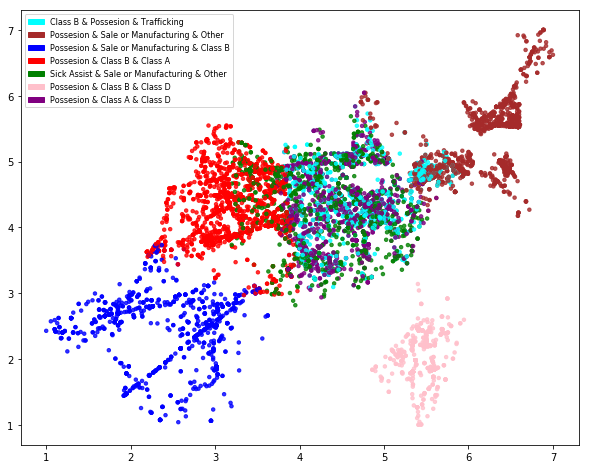

In [219]:
# Plot clusters (Kmeans)
k=7
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10)
y_pred = kmeans.fit_predict(feature_arr_matrix)
labels = kmeans.labels_
import matplotlib.patches as mpatches
label_names_kmeans = label_clusters(labels)
cols = ["aqua", "brown", "blue", "red","green", "pink", "purple"]#, "gold"]
cols_kmeans = [["aqua", "brown", "blue", "red","green", "pink", "purple"][l] for l in labels]#, "green", "pink", "purple", "gold"][l] for l in labels]
plt.figure(figsize=(10,8))
patch = [None for i in range(7)]
for i in range(len(patch)):
    patch[i] = mpatches.Patch(color = cols[i], label = label_names_kmeans[i])
plt.legend(handles=patch, loc = 'upper left', prop={'size': 8})
#plt.title("Restaurants in Las Vegas (Kmeans++)")
#plt.xlabel("Scaled Latitude")
#plt.ylabel("Scaled Longitude")
plt.scatter(feature_arr_matrix[:, 10], feature_arr_matrix[:, 11], s=12, alpha = 0.8, color=cols_kmeans)